# EDA

### Import visualisation libs

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
data = pd.read_csv("data/Tweets.csv", index_col=0)

### Display basic information about the dataset

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41159 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       41158 non-null  object
 1   Sentiment  41155 non-null  object
dtypes: object(2)
memory usage: 964.7+ KB
None


Data contains 41155 entries, all of them are not null

3 sentiments are not defined, let's drop them

### Drop nans

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41155 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       41155 non-null  object
 1   Sentiment  41155 non-null  object
dtypes: object(2)
memory usage: 964.6+ KB


Now we have 41155 non-null values

### Display the first few rows of the dataset

In [6]:
data.head()

,Text,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Visualize the distribution of sentiment classes

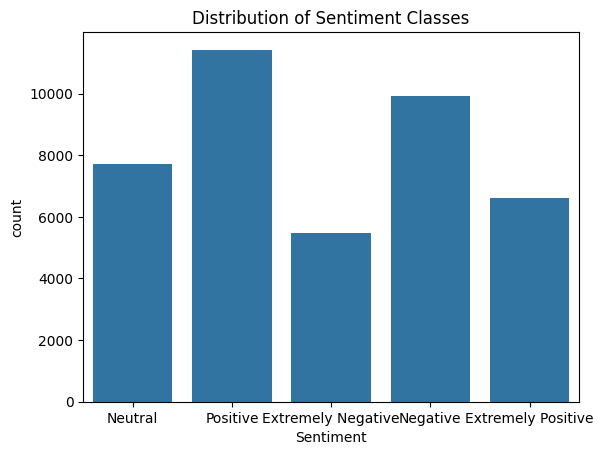

In [7]:
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiment Classes')
plt.show()

Data contains 5 sentiments (Extremely Positive, Positive, Neutral, Negative, Extremely Negative), the most of them are positive

### Display the length distribution of texts

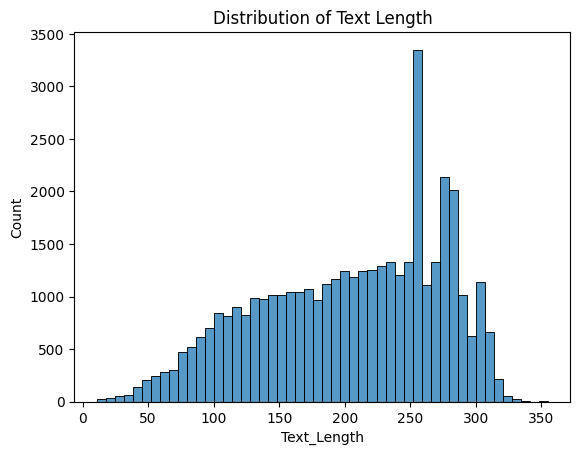

In [8]:
data['Text_Length'] = data['Text'].apply(len)
sns.histplot(data['Text_Length'], bins=50)
plt.title('Distribution of Text Length')
plt.show()

#### Let's create normalize texts function

In [9]:
import numpy as np
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text, flags=re.MULTILINE)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # You can choose either stemming or lemmatization
    # For example, using stemming:
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    
    # Check if the resulting list of words is empty
    if not words:
        return np.nan
    
    # Join the normalized words back into a string
    normalized_text = ' '.join(words)
    
    return normalized_text

[nltk_data] Downloading package punkt to /home/dzailz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dzailz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dzailz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Add normalized text to the dataset

In [10]:
data['Normalized_Text'] = data['Text'].apply(normalize_text)

Let's see the result

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41155 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             41155 non-null  object
 1   Sentiment        41155 non-null  object
 2   Text_Length      41155 non-null  int64 
 3   Normalized_Text  41128 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB


In [12]:
data.head()

,Text,Sentiment,Text_Length,Normalized_Text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,NaN
1,advice Talk to your neighbours family to excha...,Positive,237,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,306,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,readi go supermarket covid19 outbreak im paran...


We have empty texts, let's drop them

#### Drop NaN's again

In [13]:
data = data.dropna()

Check if are we fine now

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41128 entries, 1 to 41156
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             41128 non-null  object
 1   Sentiment        41128 non-null  object
 2   Text_Length      41128 non-null  int64 
 3   Normalized_Text  41128 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


### Display word cloud for each sentiment class

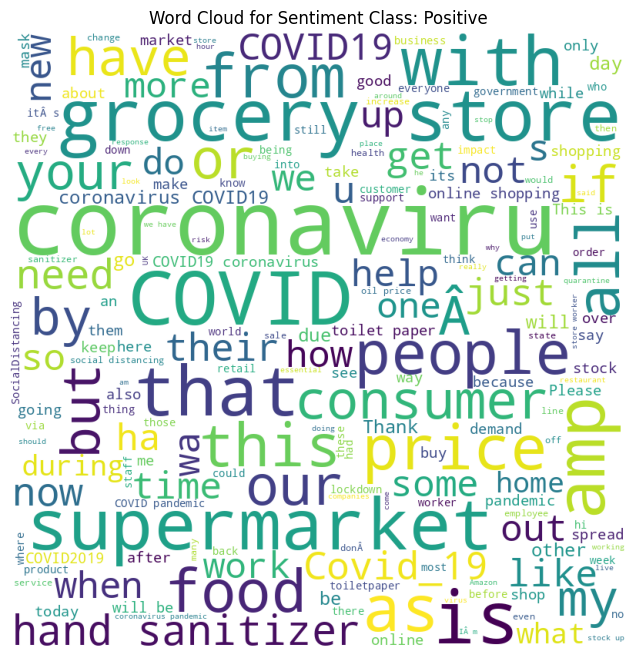

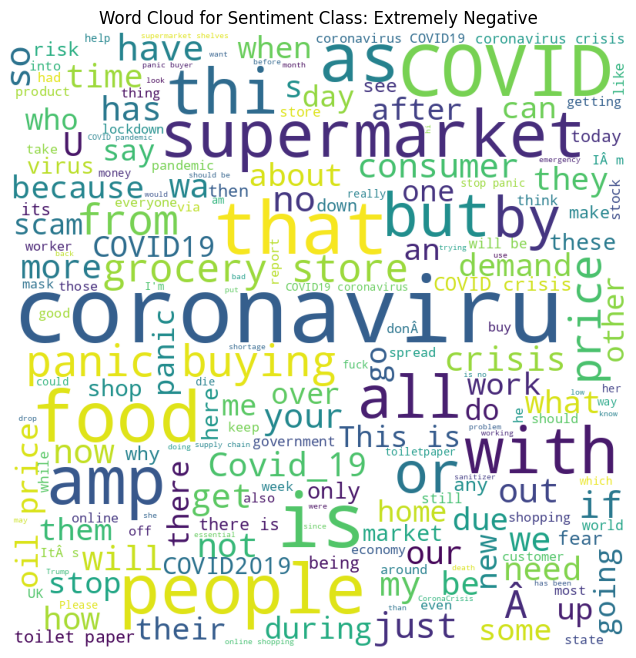

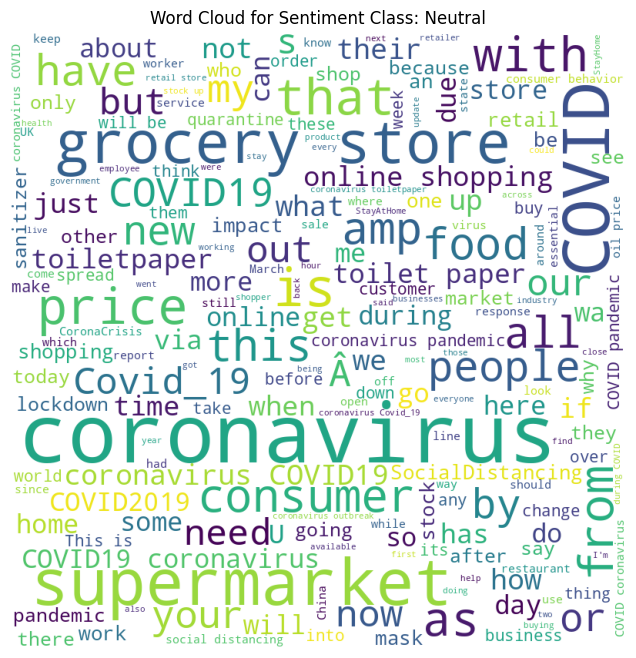

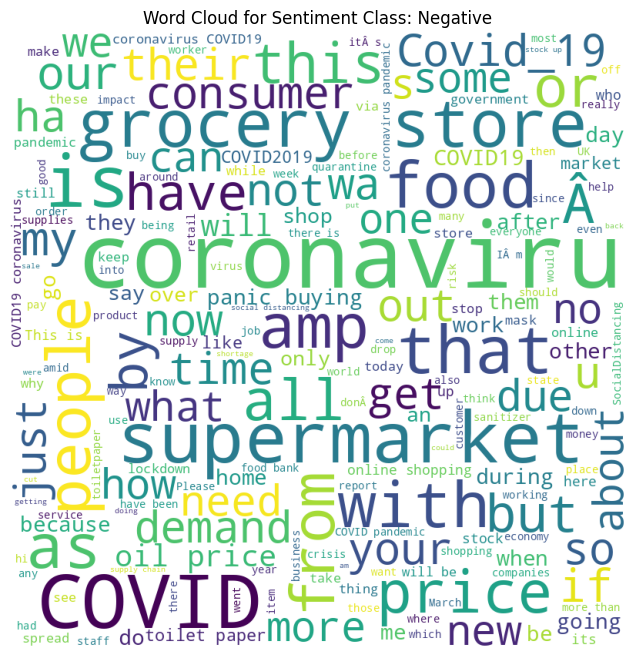

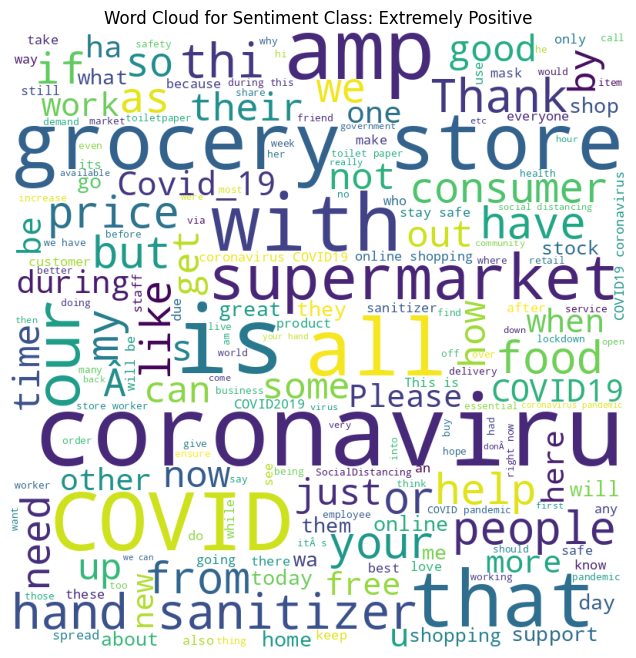

In [15]:
from wordcloud import WordCloud

for sentiment_class in data['Sentiment'].unique():
    text = " ".join(data[data['Sentiment'] == sentiment_class]['Text'])
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(['the', 'and', 'to', 'of', 'in', 'a', "at", "by" "is", 'you', 'i', 'it', 'http', 'https', 't', 'co', 'on', 'are', 'for']),
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.title(f'Word Cloud for Sentiment Class: {sentiment_class}')
    plt.show()


# Heuristic for Target Class Prediction:

For a naive heuristic, let's use simple keyword matching. For example, if the text contains positive words like "happy," "great," or "awesome," predict a positive sentiment.

In [16]:
def naive_heuristic(text):
    positive_words = ['happy', 'good', 'free', 'like']
    extremely_positive_words = ['great', 'awesome', 'excellent', 'free', 'like', 'hand sanitizer', 'during']
    negative_words = ['sad', 'bad', 'toilet paper', 'scam', 'consumer']
    extremely_negative_words = ['terrible', 'awful', 'horrible', 'panic', 'scam', 'crisis', 'consumer']

    for word in positive_words:
        if word in text:
            return 'Positive'

    for word in negative_words:
        if word in text:
            return 'Negative'
        
    for word in extremely_negative_words:
        if word in text:
            return 'Extremely Negative'
        
    for word in extremely_positive_words:
        if word in text:
            return 'Extremely Positive'

    return 'Neutral'


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

In [18]:
# Apply the naive heuristic to make predictions on the validation set
y_pred_heuristic = X_valid.apply(naive_heuristic)

# Evaluate the performance of the heuristic
print(f'Accuracy of Naive Heuristic: {accuracy_score(y_valid, y_pred_heuristic)}')
print('\nClassification Report for Naive Heuristic:\n', classification_report(y_valid, y_pred_heuristic))

Accuracy of Naive Heuristic: 0.27546802820325794

Classification Report for Naive Heuristic:
                     precision    recall  f1-score   support

Extremely Negative       0.41      0.26      0.32      1094
Extremely Positive       0.37      0.18      0.24      1252
          Negative       0.26      0.13      0.17      2055
           Neutral       0.23      0.77      0.35      1506
          Positive       0.38      0.14      0.21      2319

          accuracy                           0.28      8226
         macro avg       0.33      0.30      0.26      8226
      weighted avg       0.33      0.28      0.25      8226



The result is almost as a dice roll

# Text Vectorization and ML Model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight

## Split the data into training and validation sets

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(data['Normalized_Text'], data['Sentiment'], test_size=0.2, random_state=42)

## Compute class weights

In [21]:
classes = y_train.unique()
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)


## Print the class weights

In [22]:
for class_label, weight in zip(classes, class_weights):
    print(f'Class "{class_label}": {weight:.2f}')

Class "Negative": 0.84
Class "Positive": 0.72
Class "Extremely Positive": 1.22
Class "Extremely Negative": 1.50
Class "Neutral": 1.06


### Save our class weights as dict

In [23]:
cw = dict(zip(classes, class_weights))

## Vectorize the text using CountVectorizer

In [24]:
vectorizer = CountVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

## Naive Bayes classifier

### Train a Naive Bayes classifier

In [25]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vec, y_train)

MultinomialNB()

### Predict on the validation set

In [26]:

nb_y_pred_valid = naive_bayes_classifier.predict(X_valid_vec)

### Evaluate the performance

In [27]:
print(f'Accuracy: {accuracy_score(y_valid, nb_y_pred_valid)}')
print('\nClassification Report:\n', classification_report(y_valid, nb_y_pred_valid))

Accuracy: 0.4839533187454413

Classification Report:
                     precision    recall  f1-score   support

Extremely Negative       0.52      0.51      0.51      1094
Extremely Positive       0.51      0.53      0.52      1252
          Negative       0.45      0.45      0.45      2055
           Neutral       0.56      0.53      0.55      1506
          Positive       0.43      0.45      0.44      2319

          accuracy                           0.48      8226
         macro avg       0.50      0.49      0.49      8226
      weighted avg       0.49      0.48      0.48      8226



**Naive Bayes classifier 20% better than "full naive"**

## SVC

### Fit SVC

In [28]:
from sklearn.svm import SVC

svc = SVC(verbose=True, random_state=42, class_weight=cw, cache_size=10000)
svc.fit(X_train_vec, y_train)


[LibSVM]

........*...*
optimization finished, #iter = 11058
obj = -2192.529090, rho = 0.044058
nSV = 6244, nBSV = 525
............*...*
optimization finished, #iter = 15238
obj = -5417.870127, rho = -0.277428
nSV = 10460, nBSV = 4228
........*...*
optimization finished, #iter = 11551
obj = -2750.070893, rho = -0.591014
nSV = 6471, nBSV = 1262
...........*...*
optimization finished, #iter = 14955
obj = -3572.320899, rho = -0.006699
nSV = 9376, nBSV = 2705
..........*....*
optimization finished, #iter = 14151
obj = -3498.623090, rho = -0.061698
nSV = 9014, nBSV = 2401
........*...*
optimization finished, #iter = 11780
obj = -2767.224064, rho = -0.604970
nSV = 6730, nBSV = 1429
.............*...*
optimization finished, #iter = 16041
obj = -5690.762964, rho = -0.326947
nSV = 11871, nBSV = 5422
............*....*
optimization finished, #iter = 16087
obj = -5429.558876, rho = -0.906125
nSV = 10689, nBSV = 4186
...............*...*
optimization finished, #iter = 18794
obj = -6674.401807, rho = 0.02165

SVC(cache_size=10000,
    class_weight={'Extremely Negative': 1.4999772053795304,
                  'Extremely Positive': 1.2249441548771407,
                  'Negative': 0.8370945172369928, 'Neutral': 1.064617375829154,
                  'Positive': 0.7230414240193386},
    random_state=42, verbose=True)

### Predict using the trained SVC model

In [29]:
svc_y_pred_valid = svc.predict(X_valid_vec)

### Evaluate the performance

In [30]:
print(f'Accuracy: {accuracy_score(y_valid, svc_y_pred_valid)}')
print('\nClassification Report:\n', classification_report(y_valid, svc_y_pred_valid))

Accuracy: 0.588013615365913

Classification Report:
                     precision    recall  f1-score   support

Extremely Negative       0.62      0.62      0.62      1094
Extremely Positive       0.65      0.65      0.65      1252
          Negative       0.56      0.49      0.52      2055
           Neutral       0.57      0.76      0.65      1506
          Positive       0.57      0.51      0.54      2319

          accuracy                           0.59      8226
         macro avg       0.60      0.61      0.60      8226
      weighted avg       0.59      0.59      0.58      8226



#### **SVC** is much better than naive Bayesian classifier

## ExtraTreesClassifier

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [32]:
X = data[['Text_Length', 'Normalized_Text']]
y = data['Sentiment']

### Split the data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Convert text data to TF-IDF vectors

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Normalized_Text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Normalized_Text'])


### Train an ExtraTreesClassifier

In [35]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight=cw, n_jobs=-1)  # You can adjust parameters
clf.fit(X_train_tfidf, y_train)

ExtraTreesClassifier(class_weight={'Extremely Negative': 1.4999772053795304,
                                   'Extremely Positive': 1.2249441548771407,
                                   'Negative': 0.8370945172369928,
                                   'Neutral': 1.064617375829154,
                                   'Positive': 0.7230414240193386},
                     n_jobs=-1, random_state=42)

### Make predictions on the test set

In [36]:
y_pred = clf.predict(X_test_tfidf)

### Evaluate the model

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.5795040116703136
                    precision    recall  f1-score   support

Extremely Negative       0.63      0.49      0.55      1094
Extremely Positive       0.61      0.51      0.56      1252
          Negative       0.55      0.53      0.54      2055
           Neutral       0.65      0.75      0.70      1506
          Positive       0.52      0.59      0.56      2319

          accuracy                           0.58      8226
         macro avg       0.59      0.57      0.58      8226
      weighted avg       0.58      0.58      0.58      8226



In [38]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

### Plot confusion matrix as a heatmap

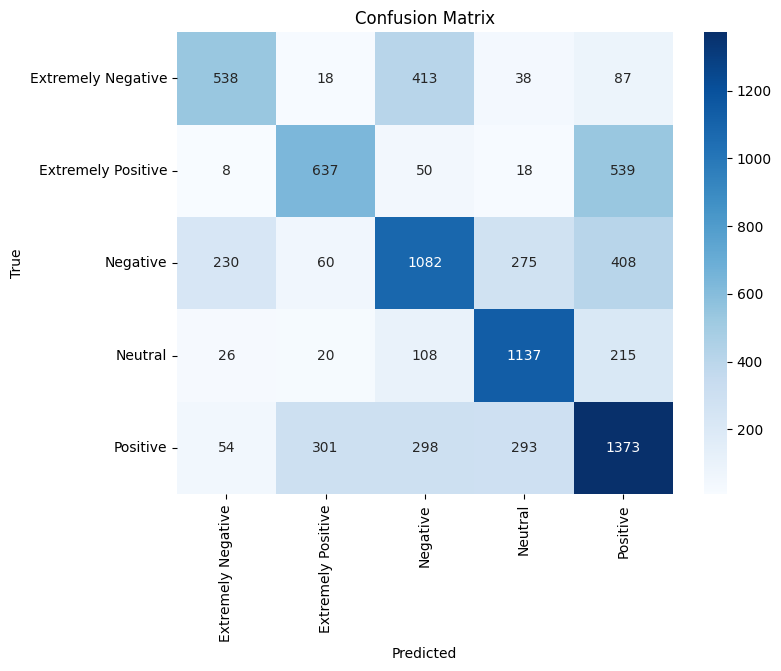

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Plot the distribution of predicted sentiments with a hue on true sentiments

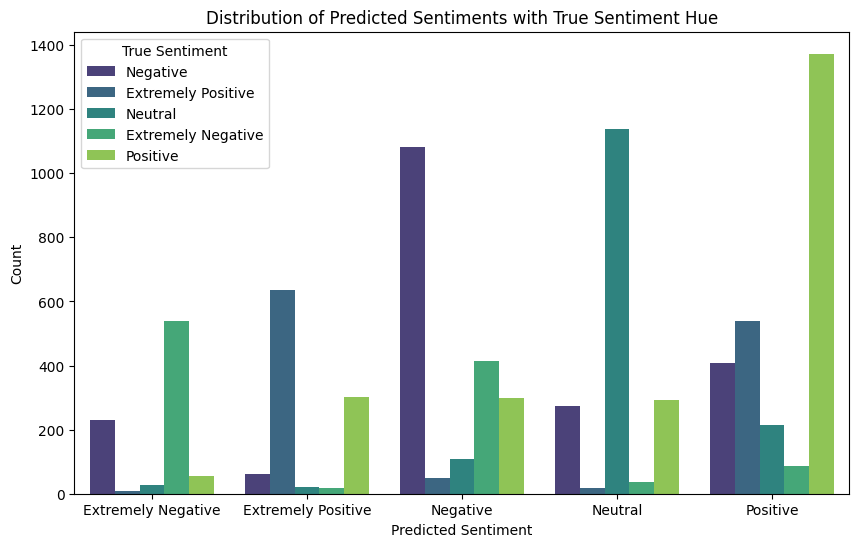

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, hue=y_test, order=clf.classes_, palette='viridis')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiments with True Sentiment Hue')
plt.legend(title='True Sentiment')
plt.show()

### ExtraTreesClassifier is almost equal SVC, but up to 12 times faster!